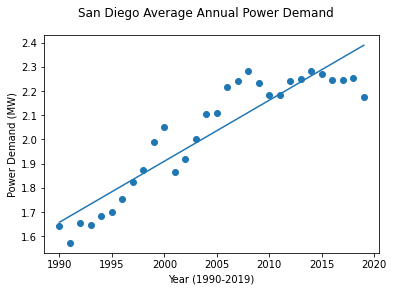

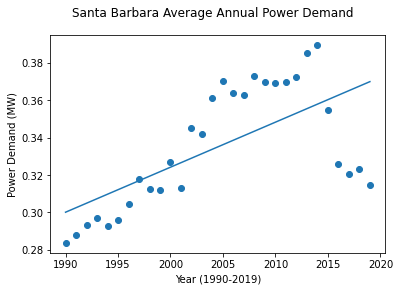

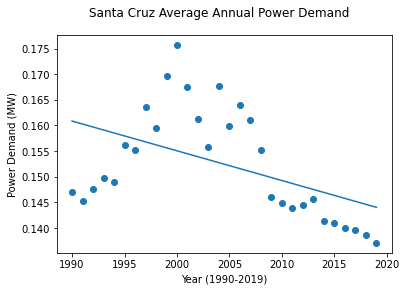

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np


def read_csv():
    with open("data3.csv") as csvfile: # same location as data3.csv
        datareader = csv.reader(csvfile, delimiter=',')
        years = []
        counties = []
        num_counties = len(next(datareader)) - 1 # calculate number of columns
        csvfile.seek(0) # reset dataset after the next(...) function call

        for i in range(num_counties):
            counties.append([])
        for row in datareader:
            years.append(float(row[0]))
            for i in range(num_counties):
                counties[i].append(float(row[i+1]))

        returned_values = []
        returned_values.append(years)
        for i in range(num_counties):
            returned_values.append(counties[i])
            
    return returned_values


def create_regression(years, county):
    n = len(years)
    sum_x = 0
    sum_y = 0
    sum_xx = 0
    sum_xy = 0

    for i in range(n):
        x = years[i]
        y = county[i]
        sum_x += x
        sum_y += y
        xx = x * x
        sum_xx += xx
        xy = x * y
        sum_xy += xy

    result = []
    s_xy = (n * sum_xy) - (sum_x * sum_y)
    s_xx = (n * sum_xx) - (sum_x * sum_x)
    result.append(s_xy / s_xx) # slope

    x_avg = sum_x / n
    y_avg = sum_y / n
    result.append(y_avg - result[0] * x_avg) # y-intercept

    y1 = (result[0] * years[0]) + result[1]
    y2 = (result[0] * years[len(years) - 1]) + result[1]

    return y1, y2


def plot_points(county_name, county):
    xpoints = np.array(years)
    ypoints = np.array(county)

    figure = plt.figure(county_name)
    figure.suptitle(f"{county_name} Average Annual Power Demand")

    plt.scatter(xpoints, ypoints)
    plt.xlabel("Year (1990-2019)")
    plt.ylabel("Power Demand (MW)")

    regression = create_regression(years, county)
    plt.plot([years[0], years[len(years) - 1]], [regression[0], regression[1]])


values = read_csv()
years = values[0]
diego = values[1]
barbara = values[2]
cruz = values[3]

plot_points("San Diego", diego)
plot_points("Santa Barbara", barbara)
plot_points("Santa Cruz", cruz)

plt.show()
